Importing the wine dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/winequality-red.csv')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Display the correlation coefficients by taking 'alcohol' as target variable

In [ ]:
#take the 'alcohol' as target variable
correlation_with_quality = df.corr()['quality']

# Display the correlation coefficients
print(correlation_with_quality)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


Correlation with quality with 100% data

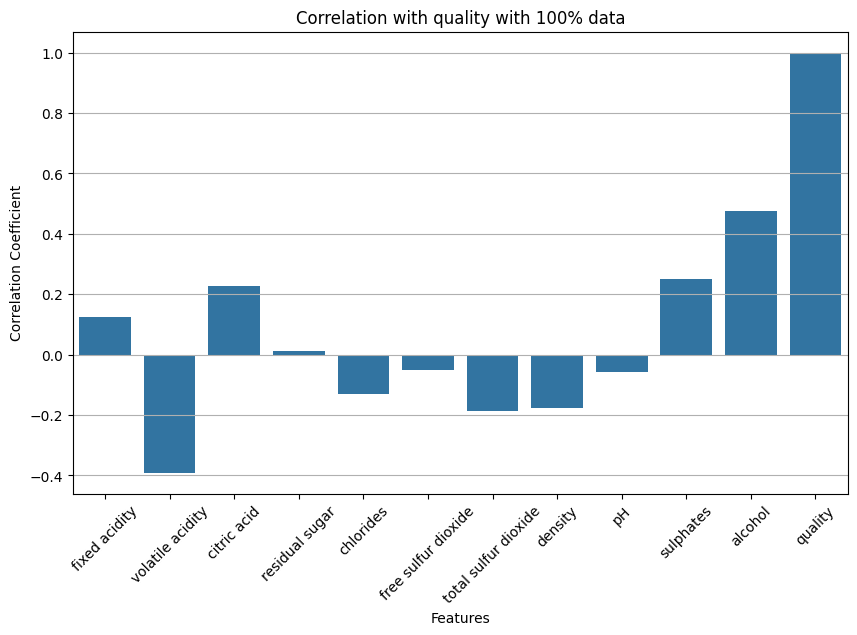

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Boston dataset into a DataFrame
df = pd.read_csv('/content/winequality-red.csv')

# Calculate the correlation between each feature and the target variable MEDV
correlation_with_quality = df.corr()['quality']

# Plotting the correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_quality.index, y=correlation_with_quality.values)
plt.title('Correlation with quality with 100% data')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Correlation between alcohol and  quality with 100% data

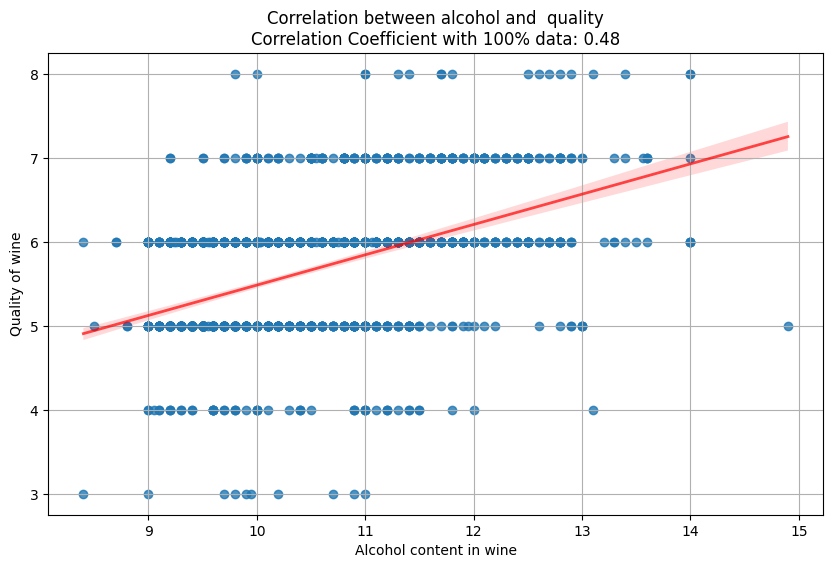

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Boston dataset into a DataFrame
df = pd.read_csv('/content/winequality-red.csv')

# Calculate the correlation coefficient between 'RM' and 'MEDV'
correlation_coef = df['alcohol'].corr(df['quality'])

# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='alcohol', y='quality', data=df, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title(f'Correlation between alcohol and quality\nCorrelation Coefficient with 100% data: {correlation_coef:.2f}')
plt.xlabel('Alcohol content in wine')
plt.ylabel('Quality of wine')
plt.grid(True)
plt.show()

Correlation between volatile acidity and quality with 100% data

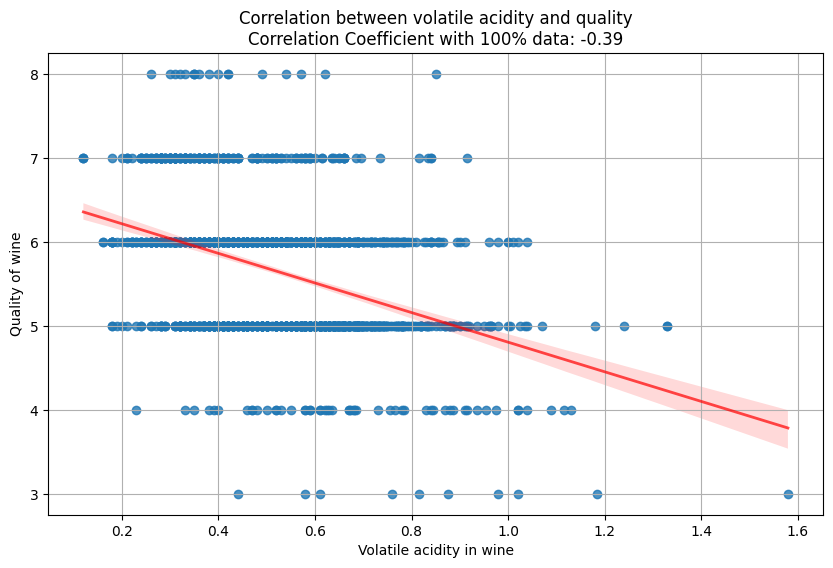

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Boston dataset into a DataFrame
df = pd.read_csv('/content/winequality-red.csv')

# Calculate the correlation coefficient between 'LSTAT' and 'MEDV'
correlation_coef = df['volatile acidity'].corr(df['quality'])

# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='volatile acidity', y='quality', data=df, line_kws={"color":"r","alpha":0.7,"lw":2})
plt.title(f'Correlation between volatile acidity and quality\nCorrelation Coefficient with 100% data: {correlation_coef:.2f}')
plt.xlabel('Volatile acidity in wine')
plt.ylabel('Quality of wine')
plt.grid(True)
plt.show()

Split the data into training and testing sets using only 50% of the dataset

In [ ]:
import pandas as pd

# Load the Boston dataset into a DataFrame
df = pd.read_csv('/content/winequality-red.csv')

# Split the data into training and testing sets using only 50% of the dataset
from sklearn.model_selection import train_test_split
_, df_train = train_test_split(df, test_size=.8, random_state=42)

# Calculate the correlation between each feature and the target variable MEDV
correlation_with_quality = df_train.corr()['quality']

# Display the correlation coefficients
print(correlation_with_quality)

fixed acidity           0.115784
volatile acidity       -0.374555
citric acid             0.222118
residual sugar          0.003642
chlorides              -0.122973
free sulfur dioxide    -0.045106
total sulfur dioxide   -0.175951
density                -0.178339
pH                     -0.076431
sulphates               0.261792
alcohol                 0.455613
quality                 1.000000
Name: quality, dtype: float64


Best subset of the dataset

In [ ]:
import pandas as pd
import numpy as np

# Load the Boston dataset into a DataFrame
df = pd.read_csv('/content/winequality-red.csv')

# Define the target variable
target_variable = 'quality'

# Initialize variables to store the best subset and its correlation
best_subset = []
max_correlation = -np.inf

# Run the loop 1000 times
for _ in range(1000):
    # Randomly select a subset of the dataset (let's say 50%)
    subset_df = df.sample(frac=0.1, random_state=np.random.randint(1000))

    # Calculate the correlation between the subset of the dataset and the target variable
    correlation = subset_df.corr().loc[target_variable].abs().mean()  # Take the average absolute correlation

    # If the correlation is higher than the previous maximum, update the best subset and max correlation
    if correlation > max_correlation:
        best_subset = subset_df
        max_correlation = correlation

# Print the best subset and its correlation
print("Best subset of the dataset:")
print(best_subset)
print("\nMax correlation with quality:", max_correlation)

Best subset of the dataset:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
64              7.2             0.725         0.05            4.65      0.086   
414             8.8             0.520         0.34            2.70      0.087   
1080           10.3             0.270         0.56            1.40      0.047   
882             8.4             0.310         0.29            3.10      0.194   
139             7.8             0.560         0.19            2.00      0.081   
...             ...               ...          ...             ...        ...   
945            10.2             0.440         0.42            2.00      0.071   
527             7.0             0.380         0.49            2.50      0.097   
1302            9.1             0.370         0.32            2.10      0.064   
83              7.3             0.670         0.26            1.80      0.401   
1128           10.0             0.430         0.33            2.70      0.095   


In [ ]:
import pandas as pd
df = pd.read_csv('/content/winequality-red.csv')

Finding maximum correlation coefficient between 50-60 % of dataset

In [ ]:
import random
from scipy.stats import pearsonr
random.seed(42)  # Set a seed for reproducibility

# Initialize variables to track the maximum correlation
max_correlation = float("-inf")
best_subset_percentage = None #to store the corresponding percentage of rows that resulted in the maximum correlation

# Iterate through percentages from 50% to 60%
for percentage in range(50, 61):
    num_rows_to_select = int(len(df) * percentage / 100)
    max_corr_for_percentage = float("-inf")  # Initialize with negative infinity

    for col in df.columns[1:-1]:
        max_correlation_coefficient = float("-inf")  # Initialize with negative infinity

        for _ in range(1000):  # Run 1000 iterations
            selected_rows = random.sample(range(len(df)), num_rows_to_select)

            col_data = df.loc[selected_rows, col].to_numpy()
            quality_data = df.loc[selected_rows, 'quality'].to_numpy()

            correlation_coefficient, p_value = pearsonr(col_data, quality_data)

            if correlation_coefficient > max_correlation_coefficient:
                max_correlation_coefficient = correlation_coefficient

        if max_correlation_coefficient > max_corr_for_percentage:
            max_corr_for_percentage = max_correlation_coefficient

    if max_corr_for_percentage > max_correlation:
        max_correlation = max_corr_for_percentage
        best_subset_percentage = percentage

# Print the subset with the highest correlation
print(f"The subset with the highest correlation with 'alcohol' between 50% and 60% of data is at {best_subset_percentage}% of data.")
print(f"The maximum correlation coefficient is {max_correlation:.2f}")

The subset with the highest correlation with 'alcohol' between 50% and 60% of data is at 55% of data.
The maximum correlation coefficient is 0.56


Graph for Correlation with 'quality' between 50% and 60% of data

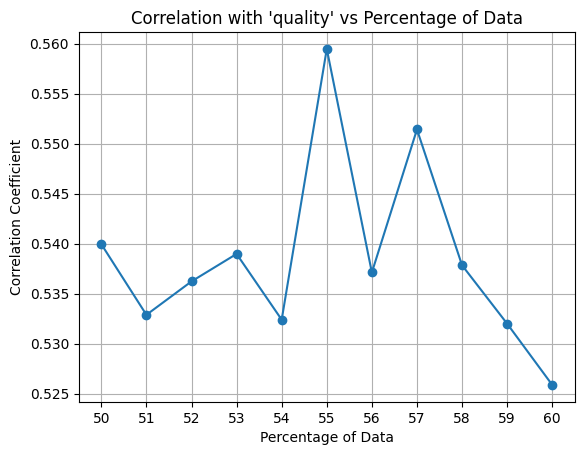

The subset with the highest correlation with 'quality' between 50% and 60% of data is at 55% of data.
The maximum correlation coefficient is 0.56


In [ ]:
import random
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

random.seed(42)  # Set a seed for reproducibility

# Initialize variables to track the maximum correlation
max_correlation = float("-inf")
best_subset_percentage = None #to store the corresponding percentage of rows that resulted in the maximum correlation
correlation_list = []  # to store correlation coefficients for each percentage

# Iterate through percentages from 50% to 60%
for percentage in range(50, 61):
    num_rows_to_select = int(len(df) * percentage / 100)
    max_corr_for_percentage = float("-inf")  # Initialize with negative infinity

    for col in df.columns[1:-1]:
        max_correlation_coefficient = float("-inf")  # Initialize with negative infinity

        for _ in range(1000):  # Run 1000 iterations
            selected_rows = random.sample(range(len(df)), num_rows_to_select)

            col_data = df.loc[selected_rows, col].to_numpy()
            quality_data = df.loc[selected_rows, 'quality'].to_numpy()

            correlation_coefficient, p_value = pearsonr(col_data, quality_data)

            if correlation_coefficient > max_correlation_coefficient:
                max_correlation_coefficient = correlation_coefficient

        if max_correlation_coefficient > max_corr_for_percentage:
            max_corr_for_percentage = max_correlation_coefficient

    # Store the max correlation coefficient for the current percentage
    correlation_list.append(max_corr_for_percentage)

    if max_corr_for_percentage > max_correlation:
        max_correlation = max_corr_for_percentage
        best_subset_percentage = percentage

# Plot the graph
percentages = range(50, 61)
plt.plot(percentages, correlation_list, marker='o')
plt.title("Correlation with 'quality' vs Percentage of Data")
plt.xlabel("Percentage of Data")
plt.ylabel("Correlation Coefficient")
plt.xticks(percentages)
plt.grid(True)
plt.show()

# Print the subset with the highest correlation
print(f"The subset with the highest correlation with 'quality' between 50% and 60% of data is at {best_subset_percentage}% of data.")
print(f"The maximum correlation coefficient is {max_correlation:.2f}")

Correlation between volatile acidity and quality with the best subset (Negetive correlation)

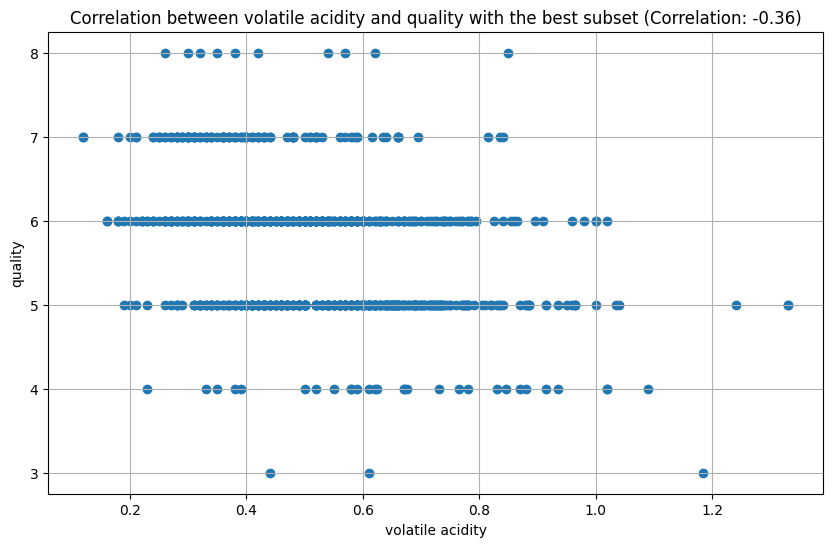

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Load the Boston dataset into a DataFrame
df = pd.read_csv('/content/winequality-red.csv')

# Define the target variable
target_variable = 'quality'

# Initialize variables to track the maximum correlation
max_correlation = float("-inf")
best_subset_df = None

# Iterate through percentages from 50% to 60%
for percentage in range(50, 61):
    # Calculate the number of rows to select based on the percentage
    num_rows_to_select = int(len(df) * percentage / 100)

    # Randomly select a subset of the dataset
    subset_df = df.sample(n=num_rows_to_select)

    # Calculate the correlation between 'volatile acidity' and 'quality'
    correlation, _ = pearsonr(subset_df['volatile acidity'], subset_df[target_variable])

    # If the correlation is higher than the previous maximum, update the max correlation and corresponding subset
    if correlation > max_correlation:
        max_correlation = correlation
        best_subset_df = subset_df

# Plot the correlation graph between 'volatile acidity' and 'quality' for the best subset
plt.figure(figsize=(10, 6))
plt.scatter(best_subset_df['volatile acidity'], best_subset_df[target_variable])
plt.title(f'Correlation between volatile acidity and quality with the best subset (Correlation: {max_correlation:.2f})')
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.grid(True)
plt.show()

Correlation between alcohol and quality with the best subset (Positive correlation)

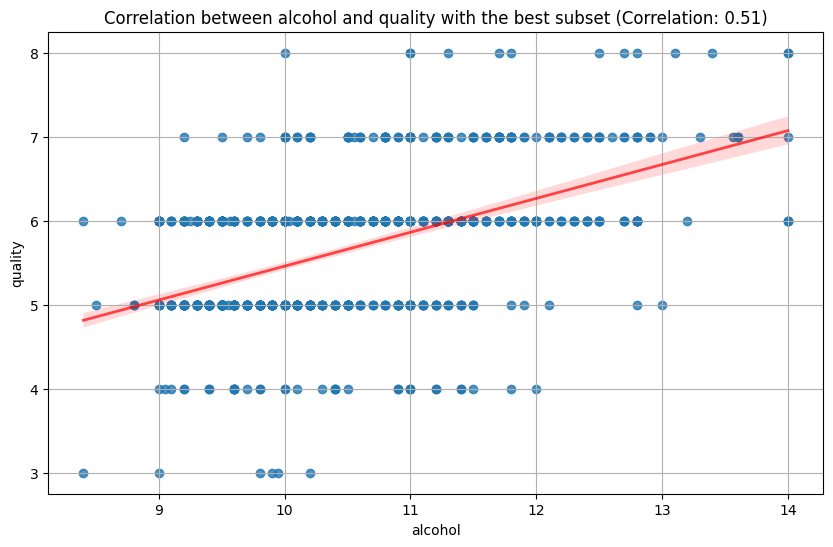

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(42)

# Load the Boston dataset into a DataFrame
df = pd.read_csv('/content/winequality-red.csv')

# Define the target variable
target_variable = 'quality'

# Initialize variables to track the maximum correlation
max_correlation = float("-inf")
best_subset_df = None

# Iterate through percentages from 50% to 60%
for percentage in range(50, 61):
    # Calculate the number of rows to select based on the percentage
    num_rows_to_select = int(len(df) * percentage / 100)

    # Randomly select a subset of the dataset
    subset_df = df.sample(n=num_rows_to_select)

    # Calculate the correlation between 'alcohol' and 'quality'
    correlation, _ = pearsonr(subset_df['alcohol'], subset_df[target_variable])

    # If the correlation is higher than the previous maximum, update the max correlation and corresponding subset
    if correlation > max_correlation:
        max_correlation = correlation
        best_subset_df = subset_df

# Plot the correlation graph between 'alcohol' and 'quality' for the best subset
plt.figure(figsize=(10, 6))
sns.regplot(x='alcohol', y='quality', data=best_subset_df, line_kws={"color":"red","alpha":0.7,"lw":2})
plt.title(f'Correlation between alcohol and quality with the best subset (Correlation: {max_correlation:.2f})')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.grid(True)
plt.show()

<ipython-input-20-e5f369ba1199>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


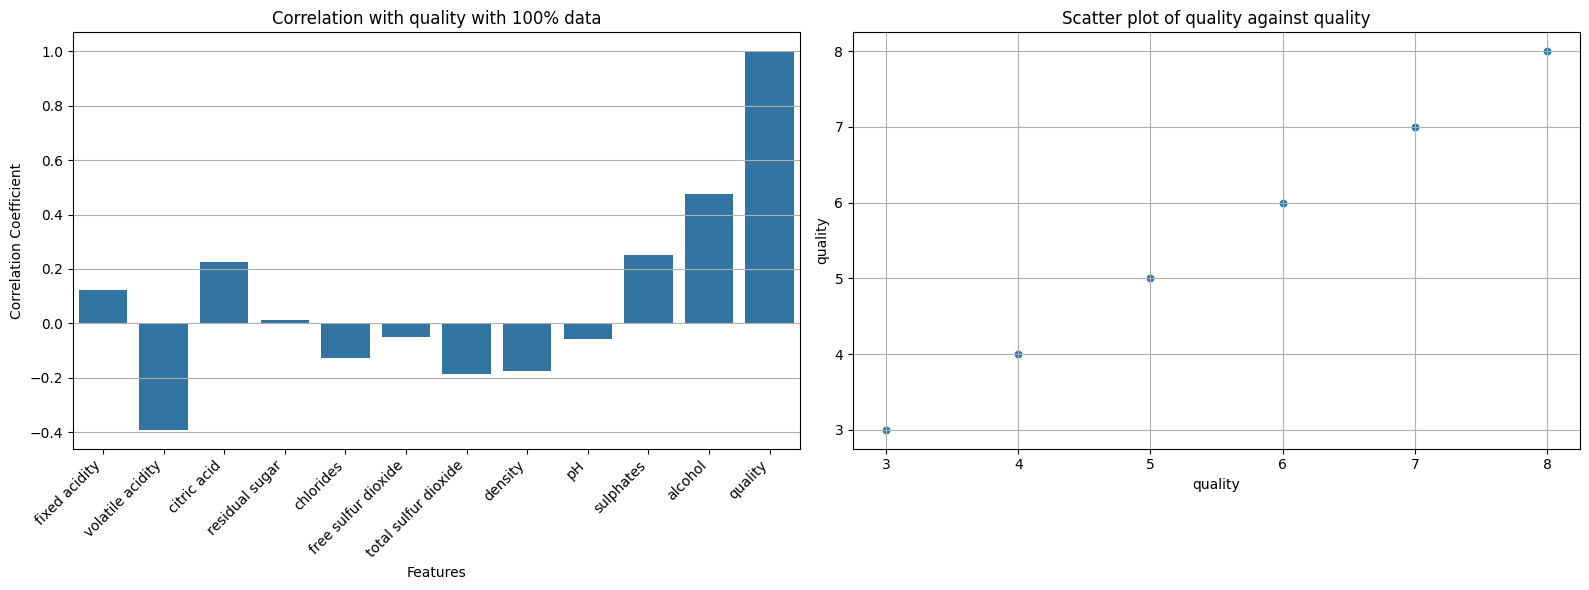

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Boston dataset into a DataFrame
df = pd.read_csv('/content/winequality-red.csv')

# Calculate the correlation between each feature and the target variable quality
correlation_with_quality = df.corr()['quality']

# Get the feature with the highest correlation
best_feature = correlation_with_quality.abs().idxmax()

# Plotting the correlation coefficients and scatter plot of the best feature against quality
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot correlation coefficients
sns.barplot(x=correlation_with_quality.index, y=correlation_with_quality.values, ax=ax1)
ax1.set_title('Correlation with quality with 100% data')
ax1.set_xlabel('Features')
ax1.set_ylabel('Correlation Coefficient')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y')

# Plot scatter plot of the best feature against quality
sns.scatterplot(x=best_feature, y='quality', data=df, ax=ax2)
ax2.set_title(f'Scatter plot of {best_feature} against quality')
ax2.set_xlabel(best_feature)
ax2.set_ylabel('quality')
ax2.grid(True)

plt.tight_layout()
plt.show()
